In [9]:
%load_ext autoreload
%autoreload 2

from ble import get_ble_controller
from base_ble import LOG
from cmd_types import CMD
import time
import numpy as np
LOG.propagate = False

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [145]:
# Get ArtemisBLEController object
ble = get_ble_controller()

# Connect to the Artemis Device
ble.connect()

2025-02-25 01:47:41,110 | INFO     |: Looking for Artemis Nano Peripheral Device: c0:81:04:26:a3:64
2025-02-25 01:47:43,998 | INFO     |: Connected to c0:81:04:26:a3:64


In [ ]:
ble.disconnect()

In [146]:
ble.send_command(CMD.PING, "")

In [147]:
s = ble.receive_string(ble.uuid['RX_STRING'])
print(s)


PONG


In [144]:
res = []
def notification_handler(uuid, byte_array):
    distance = ble.bytearray_to_string(byte_array)
    res.append(float(distance))

ble.start_notify(ble.uuid['RX_STRING'], notification_handler)
ble.send_command(CMD.TOF, "")

In [139]:
ble.stop_notify(ble.uuid['RX_STRING'])

Exception: Not connected to a BLE device

In [138]:
print(res)

[584.0, 468.0, 482.0, 466.0, 467.0, 470.0, 467.0, 457.0, 470.0, 472.0, 481.0, 470.0, 473.0, 472.0, 460.0, 472.0, 474.0, 479.0, 468.0, 465.0, 457.0, 472.0, 462.0, 470.0, 466.0, 471.0, 472.0, 470.0, 475.0, 463.0, 472.0, 458.0]
2025-02-25 00:26:56,376 | INFO     |: Disconnected from A1C0DD95-B611-6CFA-AF80-6BCF50487F59


In [104]:
all_data.append(res)

In [105]:
print(all_data)

[[48.0, 46.0, 50.0, 48.0, 48.0, 49.0, 49.0, 48.0, 48.0, 52.0, 48.0, 48.0, 52.0, 47.0, 50.0, 48.0, 50.0, 47.0, 49.0, 46.0, 49.0, 50.0, 48.0, 51.0, 48.0, 49.0, 48.0, 52.0, 47.0, 49.0, 48.0, 49.0], [105.0, 106.0, 106.0, 104.0, 107.0, 104.0, 105.0, 105.0, 103.0, 106.0, 105.0, 108.0, 102.0, 104.0, 107.0, 103.0, 104.0, 105.0, 106.0, 103.0, 106.0, 105.0, 107.0, 105.0, 103.0, 101.0, 103.0, 106.0, 104.0, 106.0, 105.0, 103.0], [156.0, 155.0, 157.0, 156.0, 153.0, 154.0, 156.0, 157.0, 160.0, 157.0, 157.0, 158.0, 157.0, 158.0, 160.0, 158.0, 156.0, 157.0, 155.0, 155.0, 155.0, 157.0, 154.0, 157.0, 155.0, 155.0, 155.0, 159.0, 155.0, 155.0, 155.0, 157.0], [203.0, 200.0, 206.0, 203.0, 203.0, 203.0, 202.0, 204.0, 205.0, 201.0, 208.0, 205.0, 204.0, 204.0, 201.0, 206.0, 205.0, 203.0, 208.0, 202.0, 201.0, 205.0, 206.0, 201.0, 206.0, 203.0, 204.0, 205.0, 205.0, 204.0, 202.0, 203.0], [248.0, 254.0, 254.0, 255.0, 252.0, 254.0, 253.0, 255.0, 252.0, 251.0, 252.0, 252.0, 252.0, 251.0, 250.0, 251.0, 251.0, 253.0, 

7


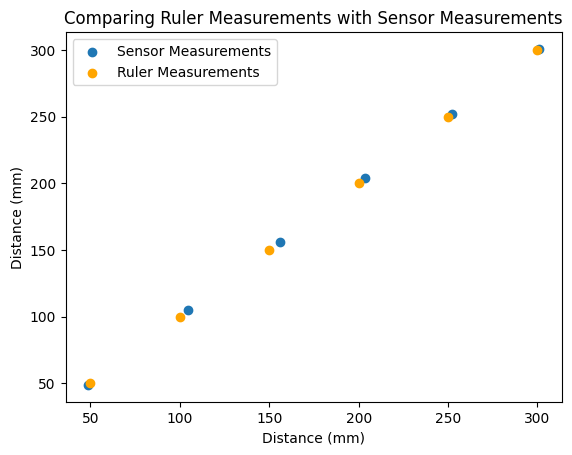

In [131]:
y_s = [50, 100, 150, 200, 250, 300]
print(len(all_data))
import matplotlib.pyplot as plt
plt.scatter(np.mean(all_data, axis=1)[:6], np.mean(all_data, axis=1)[:6], label="Sensor Measurements")
plt.scatter(y_s, y_s, label='Ruler Measurements', color='orange')
plt.xlabel('Distance (mm)')
plt.ylabel('Distance (mm)')
plt.title("Comparing Ruler Measurements with Sensor Measurements")
plt.legend()
plt.show()

In [135]:
sd = []
for meas in all_data:
    sd.append(np.std(meas))
print(np.mean(sd))

1.6890991200450813
2025-02-25 00:25:38,236 | INFO     |: Disconnected from A1C0DD95-B611-6CFA-AF80-6BCF50487F59


In [178]:
ble.stop_notify(ble.uuid['RX_STRING'])

In [179]:
data = []
def notification_handler(uuid, byte_array):
    time, distance1, distance2, pitch, roll = ble.bytearray_to_string(byte_array).split(",")
    data.append([float(time), int(distance1), int(distance2), float(pitch), float(roll)])

ble.start_notify(ble.uuid['RX_STRING'], notification_handler)
ble.send_command(CMD.TOF_AND_IMU, "")

In [1]:
print(len(data))

NameError: name 'data' is not defined

In [181]:
print(data[:5])

[[475625.0, 160, 174, -69.258, -41.461], [475666.0, 158, 172, -70.697, -44.824], [475714.0, 162, 177, -57.521, -30.936], [475762.0, 154, 177, -75.332, -53.318], [475812.0, 155, 173, -65.683, -35.067]]


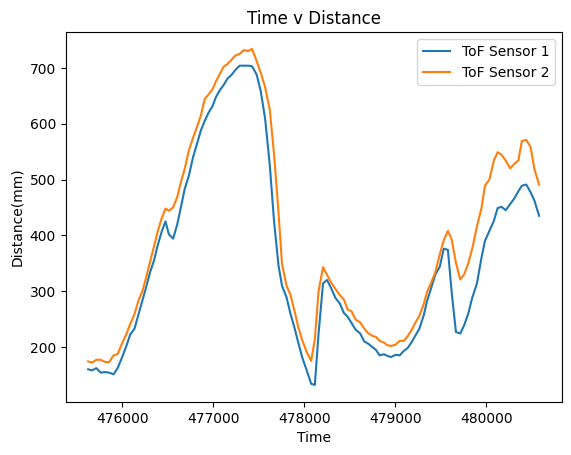

In [184]:
# Extract time, distance1, and distance2
time = [sublist[0] for sublist in data]
distance1 = [sublist[1] for sublist in data]
distance2 = [sublist[2] for sublist in data]

# Plot time vs distance1 and time vs distance2
plt.plot(time, distance1, label='ToF Sensor 1')
plt.plot(time, distance2, label='ToF Sensor 2')

# Add labels and legend
plt.xlabel('Time')
plt.ylabel('Distance(mm)')
plt.title("Time v Distance")
plt.legend()

# Display the plot
plt.show()

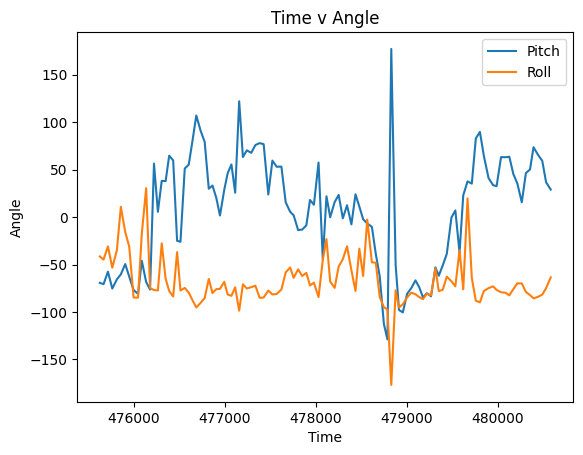

2025-02-25 02:12:34,598 | INFO     |: Disconnected from A1C0DD95-B611-6CFA-AF80-6BCF50487F59


In [186]:
# Extract time, distance1, and distance2
time = [sublist[0] for sublist in data]
distance1 = [sublist[3] for sublist in data]
distance2 = [sublist[4] for sublist in data]

# Plot time vs distance1 and time vs distance2
plt.plot(time, distance1, label='Pitch')
plt.plot(time, distance2, label='Roll')

# Add labels and legend
plt.xlabel('Time')
plt.ylabel('Angle')
plt.title("Time v Angle")
plt.legend()

# Display the plot
plt.show()